In [1]:
import astunparse

from moa.frontend import parse
from moa.visualize import visualize_ast, print_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast
from moa.backend import generate_python_source
from moa.backend.backend import add_function_node

# Frontend

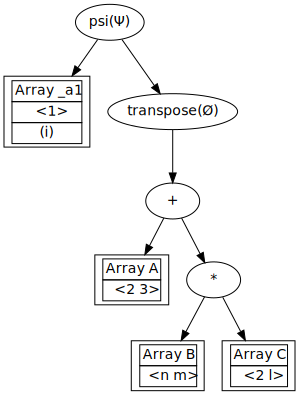

In [6]:
symbol_table, tree = parse('<i> psi (tran(A ^ <2 3> + B ^ <n m> * C ^ <2 l>))')
visualize_ast(symbol_table, tree)

# Shape Analysis

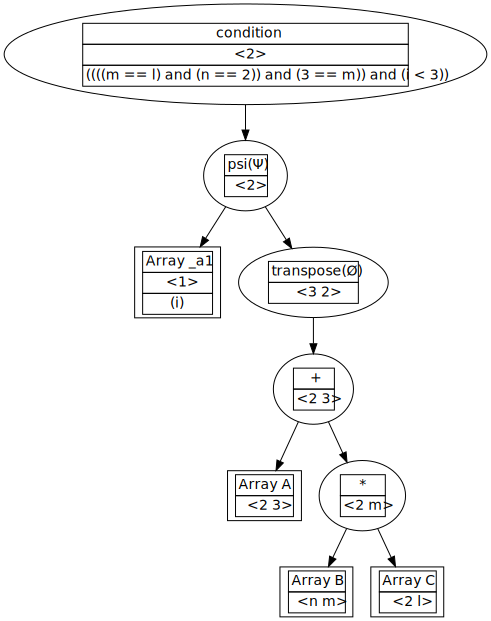

In [7]:
shape_symbol_table, shape_tree = calculate_shapes(symbol_table, tree)
visualize_ast(shape_symbol_table, shape_tree)

# Reduction to Denotational Normalized Format (DNF)

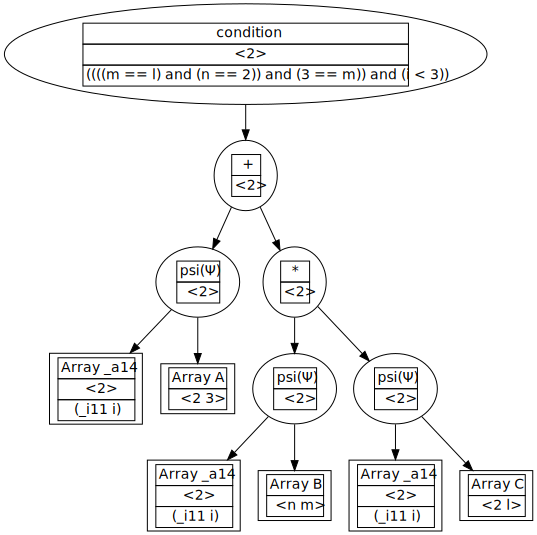

In [8]:
dnf_symbol_table, dnf_tree = reduce_ast(shape_symbol_table, shape_tree)
visualize_ast(dnf_symbol_table, dnf_tree)

# Reduction to ONF

indicies ()
FunctionNode(node_type=<MOANodeTypes.FUNCTION: 50>, shape=None, arguments=('i', 'B', 'C', 'A'), result='_a15', body=(ConditionNode(node_type=<MOANodeTypes.CONDITION: 51>, shape=(), condition_node=BinaryNode(node_type=<MOANodeTypes.AND: 256>, shape=(), left_node=BinaryNode(node_type=<MOANodeTypes.AND: 256>, shape=(), left_node=BinaryNode(node_type=<MOANodeTypes.AND: 256>, shape=(), left_node=BinaryNode(node_type=<MOANodeTypes.EQUAL: 250>, shape=(), left_node=ArrayNode(node_type=<MOANodeTypes.ARRAY: 1>, shape=(), symbol_node='m'), right_node=ArrayNode(node_type=<MOANodeTypes.ARRAY: 1>, shape=(), symbol_node='l')), right_node=BinaryNode(node_type=<MOANodeTypes.EQUAL: 250>, shape=(), left_node=ArrayNode(node_type=<MOANodeTypes.ARRAY: 1>, shape=(), symbol_node='n'), right_node=ArrayNode(node_type=<MOANodeTypes.ARRAY: 1>, shape=(), symbol_node='_a8'))), right_node=BinaryNode(node_type=<MOANodeTypes.EQUAL: 250>, shape=(), left_node=ArrayNode(node_type=<MOANodeTypes.ARRAY: 1>, shap

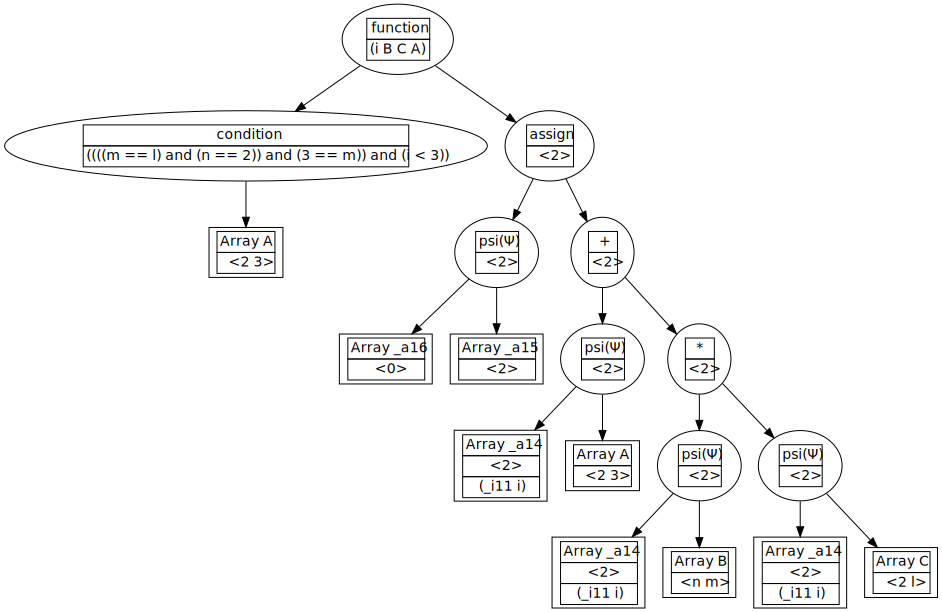

In [9]:
onf_symbol_table, onf_tree = add_function_node(dnf_symbol_table, dnf_tree)
print(onf_tree)
visualize_ast(onf_symbol_table, onf_tree)

# Backend (Python)

In [8]:
print(generate_python_source(onf_symbol_table, onf_tree, materialize_scalars=True))

AttributeError: 'ConditionNode' object has no attribute 'left_node'

In [29]:
from moa.backend.python import add_function_wrapper

In [30]:
import astunparse
print(astunparse.unparse(add_function_wrapper(reduced_symbol_table)))



def f(B, C, A):
    pass

